Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')


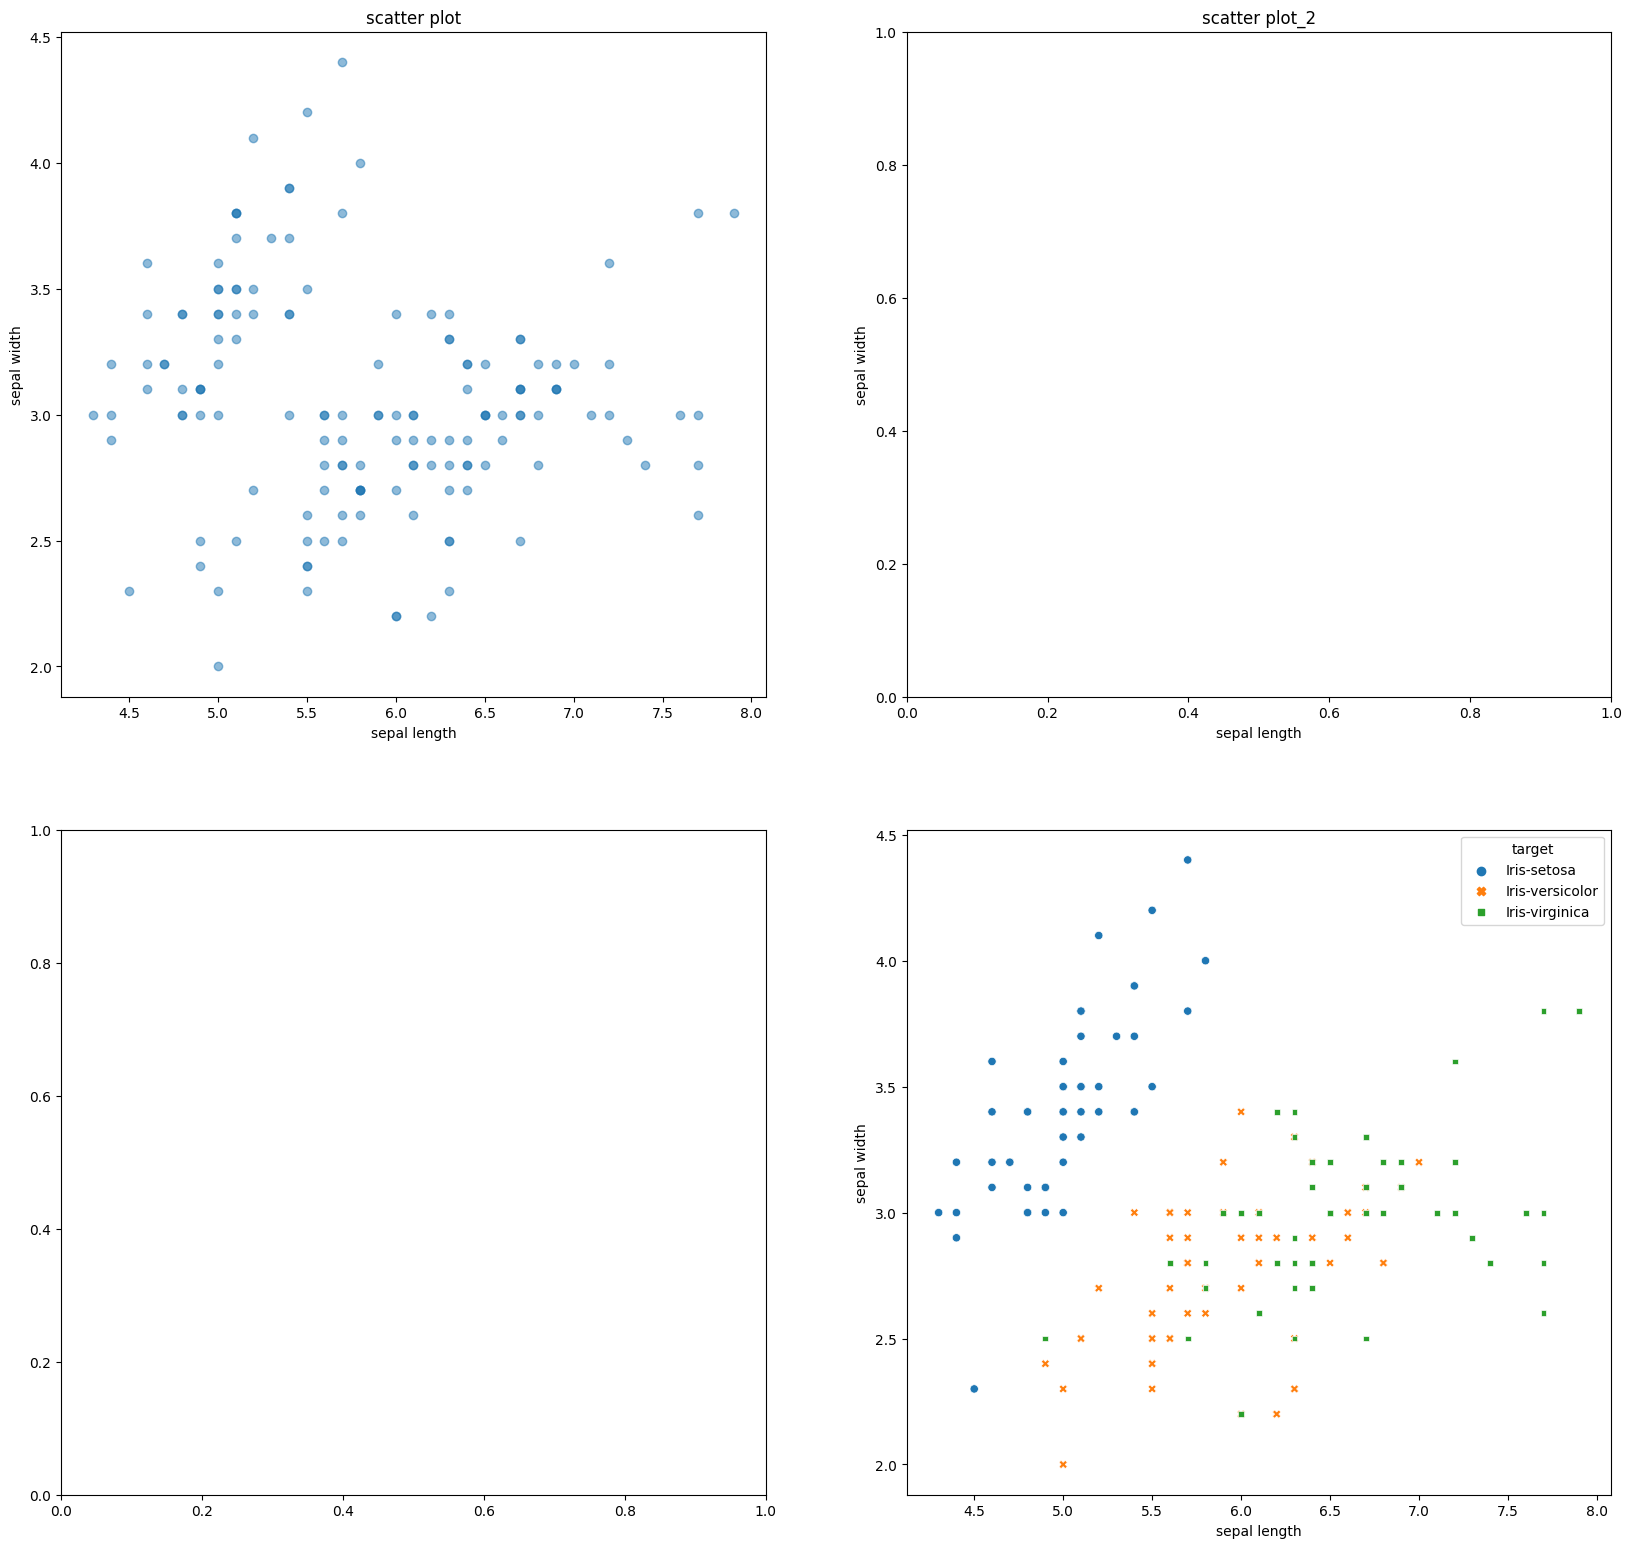

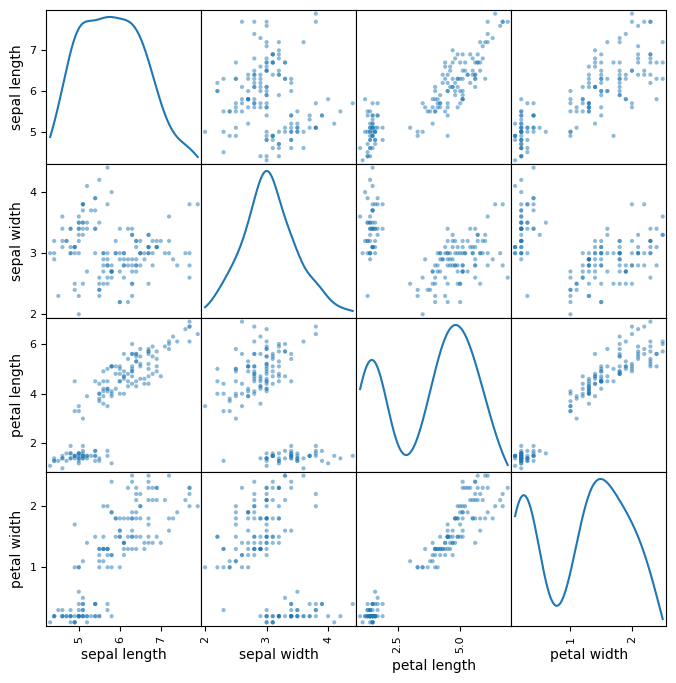

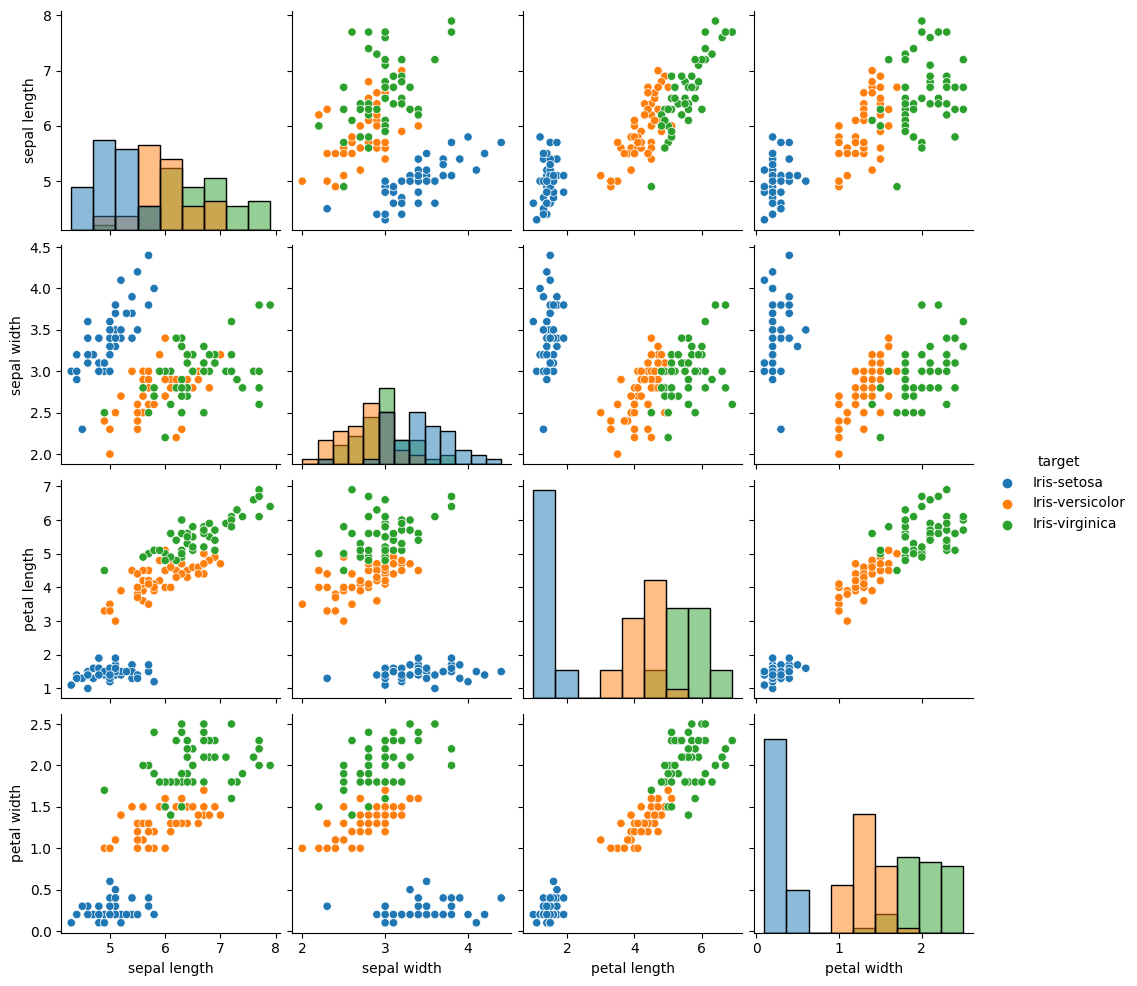

<AxesSubplot:>

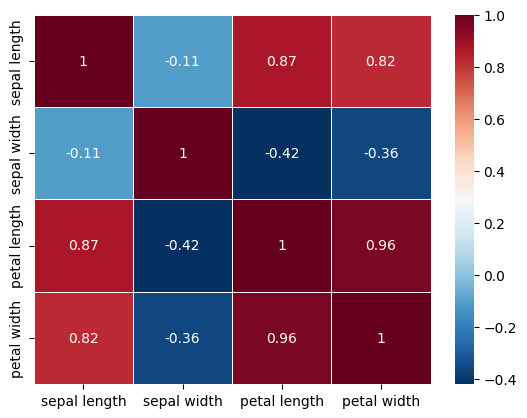

In [290]:
# 1. EDA를 위한 그래프 그리기
# 1) 분석목적확인, 변수이름 및 타입확인
# 2) 데이터 내용 확인 : df.head(), df.tail(), df.describe()
# 3) 개별 컬럼의 값 관찰
# * 범위와 분포 : 산포도, 막대그래프, 히스토그램
# * 이상치 확인 : sns.boxplot, pd.boxplot
# 4) 컬럼 간 상관관계 확인


# 1. 산포도(산점도) : 두 개의 연속형 변수의 값에 따른 데이터의 분포를 확인하는 그래프
# 1) 기본 scatter plot
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/iris.csv')
print(df.columns)

fig, axs = plt.subplots(2,2, figsize = (20,19))

axs[0][0].set_title('scatter plot')
axs[0][0].set_xlabel('sepal length')
axs[0][0].set_ylabel('sepal width')

axs[0][0].scatter(x = df['sepal length'], y = df['sepal width'], alpha = 0.5)

# 2) 타겟의 범주별 다른 색상/크기 옵션을 지정한 scatter plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

axs[0][1].set_title('scatter plot_2')
axs[0][1].set_xlabel('sepal length')
axs[0][1].set_ylabel('sepal width')
sns.scatterplot(x = df['sepal length'], y = df['sepal width'], data = df, hue = df['target'], style = df['target'])

# 3) 산점도 행렬 : 변수들 간의 산점도를 그린 그래프
# 3-1) 대각선의 히스토그램을 통해 이상치 확인
# 3-2) 종속변수가 수치형인 경우, 각 설명변수와의 직선 상관관계를 비교
# 3-2) 종속변수가 범주형인 경우, 종속변수를 잘 구분하는 변수를 파악
# 3-3) 설명변수 간의 직선 함수관계를 파악하여, 다중공선성 문제를 진단
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.5, figsize = (8,8), diagonal = 'kde') # kde
sns.pairplot(df, diag_kind = 'hist', hue = 'target') # hist
plt.show()

# 4) 히트맵 : -1 ~ 1 사이의 값으로 두 변수 간의 관계의 정도를 비교하는 그래프
# 4-1) 절대값 0.8 이상 : 강한 양/음 상관관계
# 4-2) 절대값 0.6 이상 : 양/음 상관관계
# 4-3) 절대값 0.4 이상 : 약한 양/음 상관관계
# 4-4) 절대값 0.4 미만 : 거의 상관관계 없음
import pandas as pd
import seaborn as sns
df_temp = df.drop(columns = ['target'], axis = 1).corr(method = 'pearson') # 범주형 변수는 제외 필요, kendall, spearman
sns.heatmap(df_temp, xticklabels = df_temp.columns, yticklabels = df_temp.columns,
                 cmap = 'RdBu_r',
                 annot = True, # True : 상관계수를 텍스트로 보이게 해줌
                 linewidth = 0.5
           ) 

Intercept    1.090572
petalW       2.225885
dtype: float64
-0.0026803077797933157 0.4352872123451901 -0.39127796883341326


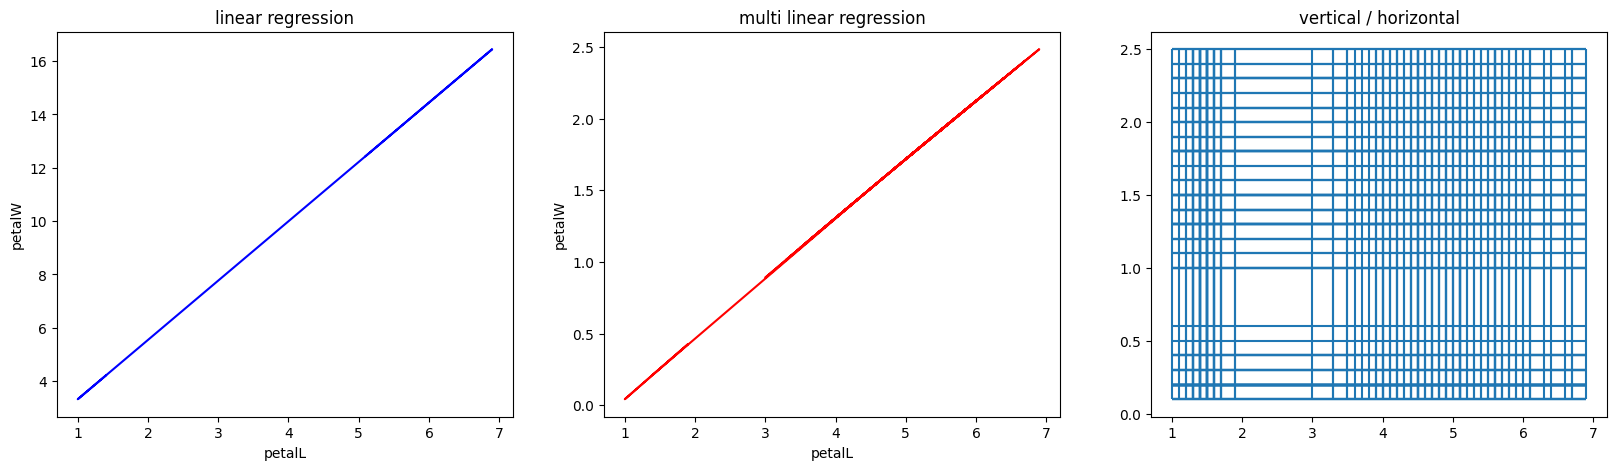

In [310]:
# 2. 선 그래프
# 1) 직선 그래프 : y = ax + b 형태의 직선이나, 수평선/수직선을 그리는 그래프
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
df = pd.read_csv('data/iris.csv')
df = df[['petal length', 'petal width']]
df.rename( columns =  {'petal length' : 'petalL', 'petal width' : 'petalW'}, 
           inplace = True
         ) 

formula = 'petalL ~ petalW'
lr = ols(formula, data = df).fit()
print(lr.params)
X = df['petalL']
y = df['petalW']

fig, axs = plt.subplots(1,3, figsize = (20,5))

# 1-1) 직선의 방정식
axs[0].set_title('linear regression')
axs[0].set_xlabel('petalL')
axs[0].set_ylabel('petalW')
axs[0].plot(X,  1.090572 + 2.225885 * X , color = 'blue' )

# 1-2) 2차 방정식
axs[1].set_title('multi linear regression')
axs[1].set_xlabel('petalL')
axs[1].set_ylabel('petalW')
import numpy as np
b2, b1, b0 = np.polyfit(X,y,2)
axs[1].plot(X, b0 + b1*X + b2*X**2, color = 'red')

# 1-3) 수직/수평 직선
X_max = X.max()
X_min = X.min()
y_max = y.max()
y_min = y.min()

axs[2].set_title('vertical / horizontal')
axs[2].vlines(X, y_min, y_max) # 수직, X축 기준 + y의 최소값/최대값
axs[2].hlines(y, X_min, X_max) # 수평, y축 기준 + X의 최소값/최대값


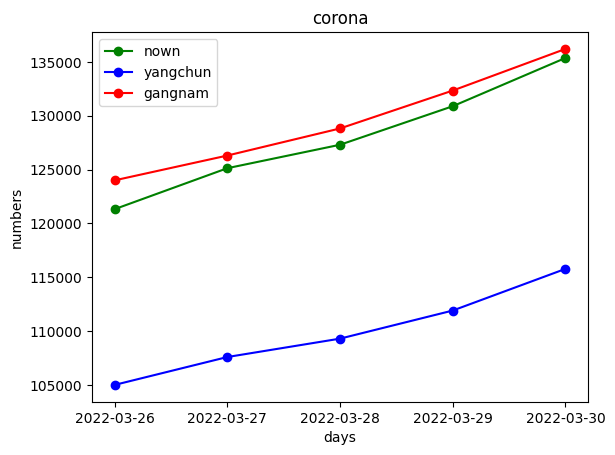

In [316]:
# 3. 꺾은선 그래프 : 흐름에 따른 데이터 변화, X축 기준으로 정렬 필요
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/서울특별시 코로나19.csv')
df = df[['날짜', '노원구', '양천구', '강남구']]
df.sort_values(by = ['날짜'], ascending = True, inplace = True) # 정렬
df = df.tail()
plt.title('corona')
plt.xlabel('days')
plt.ylabel('numbers')

plt.plot(df['날짜'], df['노원구'],  color = 'green', marker = 'o')
plt.plot(df['날짜'], df['양천구'],  color = 'blue' , marker = 'o')
plt.plot('날짜', '강남구', data = df, color = 'red' , marker = 'o')
plt.legend(['nown','yangchun','gangnam']) # 범례

plt.show()

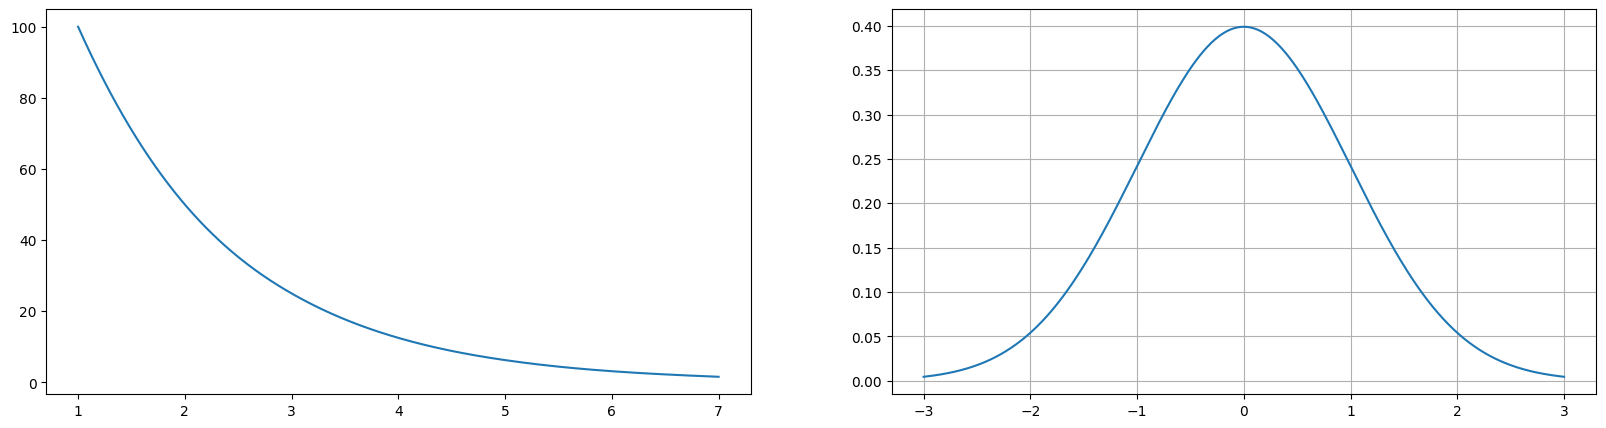

In [243]:
# 4. 곡선 그래프 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 1) 곡선그래프 기본
X=np.array([1,2,3,4,5,6,7])
y=np.array([100,50,25,12.5,6.25,3.125,1.5625])
# 주어진 데이터를 사용하여 스플라인 곡선의 계수를 추정한 후, 계수를 사용하여 좁은 간격의 X값에 대한 y값을 결정
model = make_interp_spline(X,y)

xs = np.linspace(1,7,500) # 1부터 7까지 500등분
ys = model(xs)

fig, axs = plt.subplots(1,2, figsize = (20,5))
axs[0].plot(xs, ys)

# 2) 평균 0, 표준편차 1인 확률밀도함수 및 그래프 생성 > 표준정규분포
from scipy.stats import norm
X = np.linspace(-3,3,500)
y = norm(0,1).pdf(X)

axs[1].plot(X,y)
axs[1].grid()

Index(['Third', 'First', 'Second'], dtype='object') [491 216 184]


(array([0.00360639, 0.00721278, 0.02885111, 0.03348789, 0.03812468,
        0.0303967 , 0.03812468, 0.02679031, 0.02936631, 0.01597115,
        0.01751674, 0.01442555, 0.01081917, 0.01184956, 0.00772798,
        0.00463679, 0.00566718, 0.00463679, 0.00309119, 0.0010304 ]),
 array([10., 13., 16., 19., 22., 25., 28., 31., 34., 37., 40., 43., 46.,
        49., 52., 55., 58., 61., 64., 67., 70.]),
 <BarContainer object of 20 artists>)

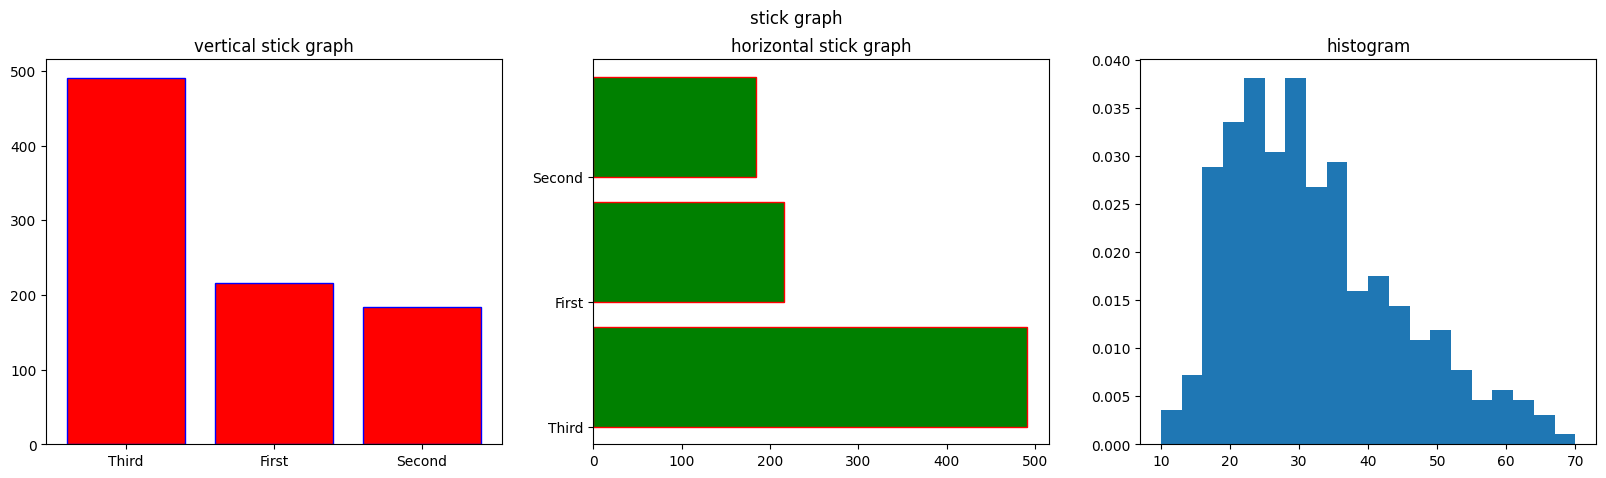

In [273]:
# 5. 막대그래프 : 범주형으로 구분된 변수의 범주별 데이터 수를 구한 것 > 범주의 순서 변경 가능
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/titanic.csv')
data = df['class'].value_counts()
print(data.index, data.values)

fig, axs = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('stick graph')
width = 0.4
# 1) 수직 막대그래프
axs[0].set_title('vertical stick graph')
axs[0].bar(data.index, data.values,
           width = 0.8, bottom = None,
           align = 'center', data = None,
           color = 'red', edgecolor = 'blue')


# 2) 수평 막대그래프
axs[1].set_title('horizontal stick graph')
axs[1].barh( data.index, data.values,
             align = 'edge', data = None,
             color = 'green', edgecolor = 'red')

# 3) 히스토그램
axs[2].set_title('histogram')
# bins : 몇 개의 구간, range = [하한값, 상한값], density = True(확률밀도함수 리턴)
axs[2].hist(df['age'], bins = 20, range = [10,70], density = True) 